# CONVOLUTION NEURAL NETWORK
🧠 What is a Convolutional Neural Network (CNN)?
A CNN is a type of neural network that uses convolutional layers to automatically learn spatial hierarchies of features from input images.

CNNs excel in:

Image classification

Object detection

Face recognition

Medical image analysis

📦 CNN Architecture Overview
CNNs are typically composed of the following layers:

1. Input Layer
Raw pixel values of an image (e.g., a 28x28 grayscale image)

2. Convolutional Layer
Applies filters (kernels) to detect features like edges, textures, etc.

Each filter slides over the image (like a window) and computes a dot product.

Output is a feature map.

Feature Map
=
∑
(
𝑤
∗
𝑥
)
+
𝑏
Feature Map=∑(w∗x)+b
3. Activation Function (ReLU)
Applied after each convolution.

ReLU = Rectified Linear Unit:

𝑓
(
𝑥
)
=
max
⁡
(
0
,
𝑥
)
f(x)=max(0,x)
Introduces non-linearity

4. Pooling Layer (Subsampling)
Reduces the spatial size (height & width), keeping important info.

Common: Max pooling → picks the maximum value in a small window.

5. Fully Connected (Dense) Layer
After several conv + pooling layers, the data is flattened and passed to fully connected layers for final decision making.

6. Output Layer
Uses softmax (for multi-class) or sigmoid (for binary) to generate class probabilities.



In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [4]:

# Define directory
dataset_dir="C:/Users/tajud/OneDrive/Desktop/NRIT/Rice_Image_Dataset/Rice_Image_Dataset"

In [6]:
# Image preprocessing
img_height, img_width = 75, 75
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [8]:

train_generator = datagen.flow_from_directory(
    dataset_dir, # Location of dataset 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)


val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes
])



model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


C:\Users\tajud\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 73, 73, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,367,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,387,653 (9.11 MB)

 Trainable params: 2,387,653 (9.11 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

C:\Users\tajud\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2570s 1s/step - accuracy: 0.9024 - loss: 0.2652 - val_accuracy: 0.9708 - val_loss: 0.0800
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 352s 188ms/step - accuracy: 0.9673 - loss: 0.0992 - val_accuracy: 0.9785 - val_loss: 0.0574
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 357s 190ms/step - accuracy: 0.9824 - loss: 0.0556 - val_accuracy: 0.9913 - val_loss: 0.0263
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 364s 194ms/step - accuracy: 0.9884 - loss: 0.0368 - val_accuracy: 0.9853 - val_loss: 0.0391
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 374s 199ms/step - accuracy: 0.9911 - loss: 0.0289 - val_accuracy: 0.9953 - val_loss: 0.0152
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 366s 195ms/step - accuracy: 0.9932 - loss: 0.0208 - val_accuracy: 0.9951 - val_loss: 0.0168
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 360s 192ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9965 - val_loss: 0.0127
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 359s 192ms/step - accu

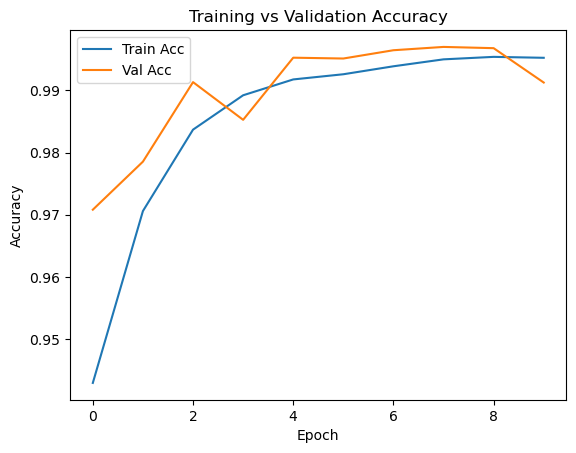

In [12]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [14]:
# Confusion matrix
import numpy as np
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 129ms/step
Confusion Matrix
[[2991    0    0    7    2]
 [   0 2968    0   32    0]
 [   2    0 2997    1    0]
 [  10    6    0 2983    1]
 [  70    0    0    0 2930]]


In [16]:
# Classification report
target_names = list(val_generator.class_indices.keys())
print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     Arborio       0.97      1.00      0.99      3000
     Basmati       1.00      0.99      0.99      3000
      Ipsala       1.00      1.00      1.00      3000
     Jasmine       0.99      0.99      0.99      3000
   Karacadag       1.00      0.98      0.99      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000

